## Ingeniería de Big Data | Unidad 3 - Actividad 1 | UNICARIBE
- Identifica temas en auge por región y momento analizando análisis de hashtags en Twitter.

In [1]:
# ============================================
#     Importando Librerias y Cargando Datos
# ============================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_palette("deep")

data_path = "../data/dataset.csv"
df = pd.read_csv(data_path)

df.head()

,id,fecha,region,hashtag,volumen_estimado
0,1,2024-01-01,North America,#NewYear2024,8500000
1,2,2024-01-01,Europe,#NewYear2024,6200000
2,3,2024-01-01,Asia Pacific,#NewYear2024,9800000
3,4,2024-01-01,Latin America,#AñoNuevo2024,4100000
4,5,2024-01-02,Global,#NewYear2024,12000000


In [2]:
# ============================
#     Limpieza de Datos
# ============================

# Manejo de valores nulos
df['volumen_estimado'] = pd.to_numeric(df['volumen_estimado'], errors='coerce')
df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')

# Rellenar nulos de volumen con 0 (o estrategia que prefieras)
df['volumen_estimado'] = df['volumen_estimado'].fillna(0)

# Eliminar filas sin fecha o región
df = df.dropna(subset=['fecha', 'region', 'hashtag'])

df.head()

,id,fecha,region,hashtag,volumen_estimado
0,1,2024-01-01,North America,#NewYear2024,8500000
1,2,2024-01-01,Europe,#NewYear2024,6200000
2,3,2024-01-01,Asia Pacific,#NewYear2024,9800000
3,4,2024-01-01,Latin America,#AñoNuevo2024,4100000
4,5,2024-01-02,Global,#NewYear2024,12000000


In [3]:
# ============================
#    Análisis Exploratorio
# ============================

print("\nTop 10 hashtags por volumen total:")
print(df.groupby('hashtag')['volumen_estimado'].sum().sort_values(ascending=False).head(10))

print("\nNúmero de hashtags únicos por región:")
print(df.groupby('region')['hashtag'].nunique())


Top 10 hashtags por volumen total:
hashtag
#Olympics2024       263600000
#Euro2024           209400000
#Election2024       162800000
#NYE2024            157600000
#Christmas2024      114000000
#Paris2024           86400000
#BlackFriday2024     84600000
#Halloween2024       72900000
#ChristmasEve        69000000
#Eurovision2024      59500000
Name: volumen_estimado, dtype: int64

Número de hashtags únicos por región:
region
Africa            3
Asia Pacific     10
Europe           27
Global           54
Latin America    15
Middle East       2
North America    25
Name: hashtag, dtype: int64


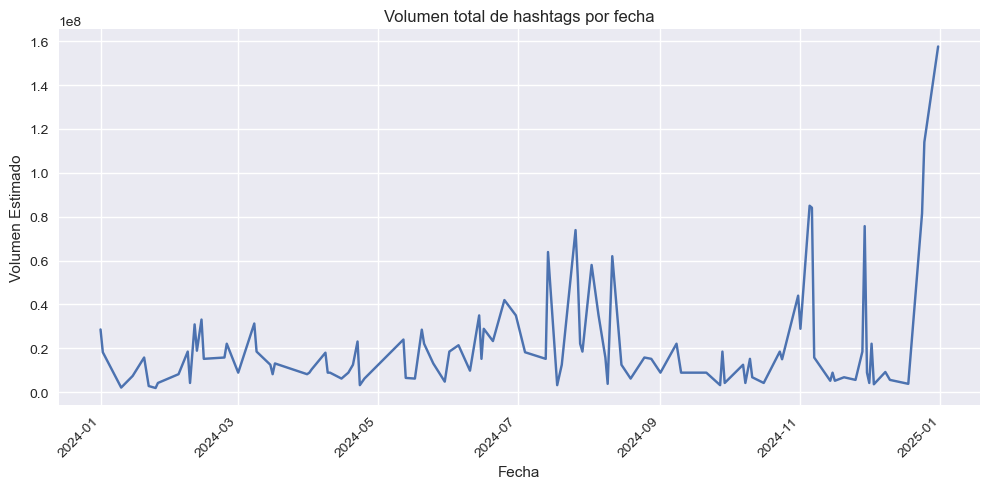

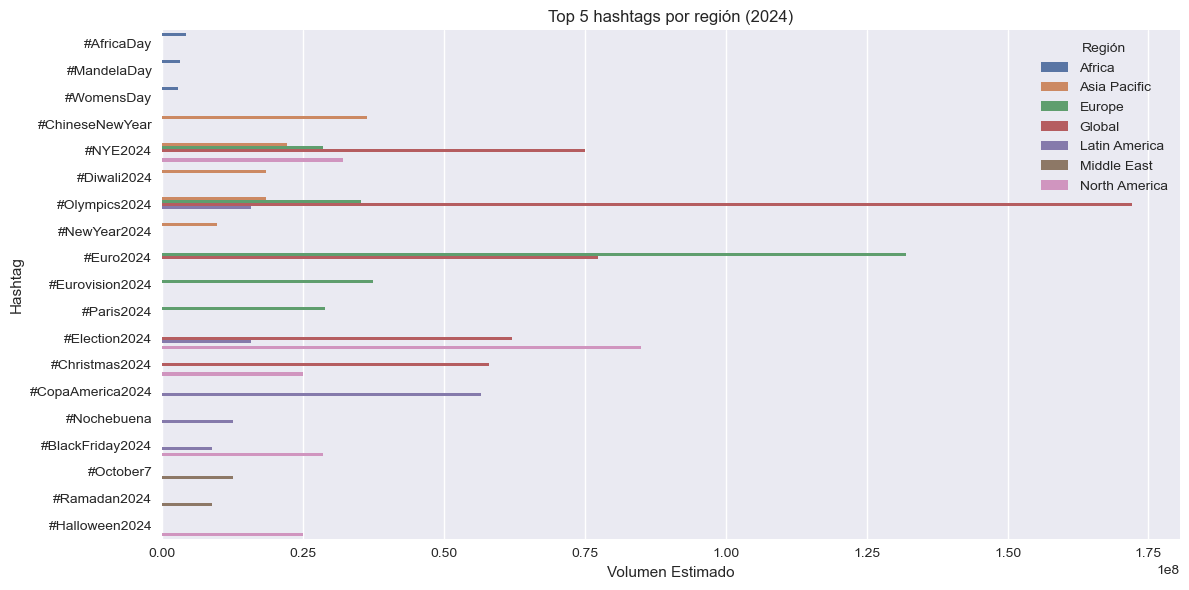

In [4]:
plt.figure(figsize=(10,5))
df.groupby('fecha')['volumen_estimado'].sum().plot()
plt.title("Volumen total de hashtags por fecha")
plt.ylabel("Volumen Estimado")
plt.xlabel("Fecha")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top hashtags por región
top_hashtags_region = (
    df.groupby(['region','hashtag'])['volumen_estimado']
      .sum()
      .reset_index()
      .sort_values(['region','volumen_estimado'], ascending=[True, False])
)

# Top 5 de cada región
top5_region = top_hashtags_region.groupby('region').head(5)

plt.figure(figsize=(12,6))
sns.barplot(data=top5_region, x='volumen_estimado', y='hashtag', hue='region')
plt.title("Top 5 hashtags por región (2024)")
plt.xlabel("Volumen Estimado")
plt.ylabel("Hashtag")
plt.legend(title="Región")
plt.tight_layout()
plt.show()
